In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Sciensano_hospital_admission_data", sep="\t", index_col = 0)
df

week0  week1  week2  week3  week4  week5  week6  week7  week8
days                                                                       
monday          NaN    110     94    105     92    128     72     84    110
tuesday         NaN    149    139    187    153    142    163    145    155
wednesday       NaN    145    142    144    121    142    132    141    150
thursday        NaN    156    133    148    138    141    137    142    142
friday        150.0    141    142    158    119    144    132    125    204
saturday      110.0    137    111    143    137    123    107    110    152
sunday        137.0     85     79    106     77    108     91     87    127

# Data used

The data in `df` the are January and February new admission hospitalisation data from Sciensano, taken from their dashboard as of Friday February 26th; the historical dataset for that date can be found here: https://epistat.sciensano.be/covid/covid19_historicaldata.html (Hospitalisations by date and provinces).

### Updates (as given by Sciensano on the following day)
###### Friday 2021/02/26 (available on Saturday 27th)
204 new hospital admissions [1]
###### Saturday 2021/02/27 (available on Sunday 28th)
152 new hospital admissions [1]
###### Sunday 2021/02/28 (available on Monday 1st)
127 new hospital admissions [2]
###### Monday 2021/03/01 (available on Tuesday 2nd)
107 new hospital admissions [3]

### References
* [1] see also, e.g. https://www.lesoir.be/357836/article/2021-02-28/coronavirus-les-hospitalisations-et-nouvelles-contaminations-toujours-en-hausse
* [2] see also, e.g. https://www.rtbf.be/info/societe/detail_coronavirus-en-belgique-ce-1er-mars-la-flambee-des-admissions-se-poursuit-les-contaminations-vers-un-plateau?id=10708440
* [3] see also, e.g. https://www.rtbf.be/info/societe/detail_coronavirus-en-belgique-ce-2-mars-les-indicateurs-d-une-troisieme-vague-tendent-a-s-estomper?id=10709253


In [3]:
df.index = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

# Probabilities of observing the results of week 8

In [4]:
from scipy.stats import norm
# FYI: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

## Testing against February data (3 first weeks of the month)

In [5]:
print("Testing week 8 against results from the [2021/02/01–2021/02/21] period, i.e. [week 5, week 8[")
print("=============================================================================================")


for day in df.index:
    
    testvalue=float(df.loc[day]["week8"]) # value for that day on week 8
    
    mean  = df.loc[day][5:8].mean() # mean for that day from week 5 to 7 included (8 excluded)
    sigma = df.loc[day][5:8].std()  # standard deviation for that day from week 5 to 7 included (8 excluded)

    print(f"{day}s:")
    print(f"mean = {mean:.4f}")
    print(f"sigma = {sigma:.4f}")

    print(f"{testvalue} is {float( (testvalue - mean)/sigma ):.4f} sigmas away from the mean {day} value over that period.")

    probability = 1 - norm(loc=mean, scale=sigma).cdf(testvalue) # P(x > testvalue)

    print(f"Probability of having a larger value: i.e. P(x > {testvalue}) = {probability:.4g}")
    print()

Testing week 8 against results from the [2021/02/01–2021/02/21] period, i.e. [week 5, week 8[
mondays:
mean = 94.6667
sigma = 29.4845
110.0 is 0.5200 sigmas away from the mean monday value over that period.
Probability of having a larger value: i.e. P(x > 110.0) = 0.3015

tuesdays:
mean = 150.0000
sigma = 11.3578
155.0 is 0.4402 sigmas away from the mean tuesday value over that period.
Probability of having a larger value: i.e. P(x > 155.0) = 0.3299

wednesdays:
mean = 138.3333
sigma = 5.5076
150.0 is 2.1183 sigmas away from the mean wednesday value over that period.
Probability of having a larger value: i.e. P(x > 150.0) = 0.01707

thursdays:
mean = 140.0000
sigma = 2.6458
142.0 is 0.7559 sigmas away from the mean thursday value over that period.
Probability of having a larger value: i.e. P(x > 142.0) = 0.2248

fridays:
mean = 133.6667
sigma = 9.6090
204.0 is 7.3195 sigmas away from the mean friday value over that period.
Probability of having a larger value: i.e. P(x > 204.0) = 1.245

## Testing against January and February data (up to week 7 included)

In [6]:
print("Testing week 8 against results over the [2021/01/01–2021/02/21] period, i.e. [week 0, week 8[")
print("=============================================================================================")


for day in df.index:
    
    testvalue=float(df.loc[day]["week8"]) # value for that day on week 8
    
    mean=df.loc[day][0:8].mean() # mean for that day from week 0 to 7 included (8 excluded)
    sigma=df.loc[day][0:8].std() # standard deviation for that day from week 0 to 7 included (8 excluded)

    print(f"{day}s:")
    print(f"mean = {mean:.4f}")
    print(f"sigma = {sigma:.4f}")

    print(f"{testvalue} is {float( (testvalue - mean)/sigma ):.4f} sigmas away from the mean {day} value over that period.")

    probability = 1 - norm(loc=mean, scale=sigma).cdf(testvalue) # P(x > testvalue)

    print(f"Probability of having a larger value: i.e. P(x > {testvalue}) = {probability:.4g}")
    print()

Testing week 8 against results over the [2021/01/01–2021/02/21] period, i.e. [week 0, week 8[
mondays:
mean = 97.8571
sigma = 18.3342
110.0 is 0.6623 sigmas away from the mean monday value over that period.
Probability of having a larger value: i.e. P(x > 110.0) = 0.2539

tuesdays:
mean = 154.0000
sigma = 16.5630
155.0 is 0.0604 sigmas away from the mean tuesday value over that period.
Probability of having a larger value: i.e. P(x > 155.0) = 0.4759

wednesdays:
mean = 138.1429
sigma = 8.6685
150.0 is 1.3678 sigmas away from the mean wednesday value over that period.
Probability of having a larger value: i.e. P(x > 150.0) = 0.08568

thursdays:
mean = 142.1429
sigma = 7.6904
142.0 is -0.0186 sigmas away from the mean thursday value over that period.
Probability of having a larger value: i.e. P(x > 142.0) = 0.5074

fridays:
mean = 138.8750
sigma = 12.9000
204.0 is 5.0484 sigmas away from the mean friday value over that period.
Probability of having a larger value: i.e. P(x > 204.0) = 2.2

# Waiting for more data in the coming days

* Should the values of the next few days (less than a week from now) actually go down instead of growing exponentially, and be once again compatible with the original distribution (i.e. the rather stable plateau that we observe since the beginning of the year, with an upper envelope of ~ 150 new hospital admissions per day), an error in the data (at least for Friday 26th 2021) should definitely be investigated. 

  Given the importance of this specific dataset on public decisions taken by the government, such an error in the data would strongly highlight the need for a real open-data policy in Belgium, which should include the number of new admissions per individual hospital, with the associated hospital name, to enable cross-checks.

   

* Should, on the contrary, the number of new admissions exponentially increase in the next few days, the impossibly unlikely probability obtained for Friday 26th 2021 in particular could likely indicate the beginning of a third wave (that can no longer be characterised by the stable distribution observed so far in 2021).

# Updates

## Saturday February 27th: 152 new admissions

    value updated on 2021/02/28

## Sunday February 28th: 127 new admissions

    value updated on 2021/03/01

## Monday March 1st: 107 new admissions

    value updated on 2021/03/02 [to be added]
    
The script should actually now be slightly adapted to test values from March. 

Though it is of course possible to keep testing with respect to the same weeks used thus far (i.e. week0 to week7), testing the new values since 2021/02/26 against all the data from the period [2021/01/01, 2021/02/25] would allow using values from the beginning of week8 (until Thursday) as well.

# Bonus

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#Table_of_numerical_values (putting things in perspective)

http://www.endmemo.com/statistics/gaussian.php (simple online tool)

# Further calculations (added on Tuesday 2021/03/02)

In [7]:
# using more data to build a single gaussian distribution

# take all data from January 1st to week7, excluding days known to be affected by the weekly weekend drop, 
# to isolate the upper trend, and use that for calculations

upper_envelope = df.loc[["tuesday","wednesday","thursday","friday"],\
                        ["week0","week1","week2","week3","week4","week5","week6","week7"]]

upper_envelope

week0  week1  week2  week3  week4  week5  week6  week7
tuesday      NaN    149    139    187    153    142    163    145
wednesday    NaN    145    142    144    121    142    132    141
thursday     NaN    156    133    148    138    141    137    142
friday     150.0    141    142    158    119    144    132    125

Including Tuesdays is more conservative: they indeed tend to be systematically higher than other day of the week (directly following the weekend drop).

See e.g. https://www.covidata.be/embed/static_html/4dcc336d929bacdf9be7dacbda38d3ebe73e27cb/bar_hospitalization_in_en

In [8]:
upper_envelope = pd.array(upper_envelope.to_numpy().reshape(-1)) # turning the dataframe in a 1D array (32 entries)
upper_envelope

<PandasArray>
[  nan, 149.0, 139.0, 187.0, 153.0, 142.0, 163.0, 145.0,   nan, 145.0, 142.0,
 144.0, 121.0, 142.0, 132.0, 141.0,   nan, 156.0, 133.0, 148.0, 138.0, 141.0,
 137.0, 142.0, 150.0, 141.0, 142.0, 158.0, 119.0, 144.0, 132.0, 125.0]
Length: 32, dtype: float64

In [9]:
import matplotlib.pyplot as plt

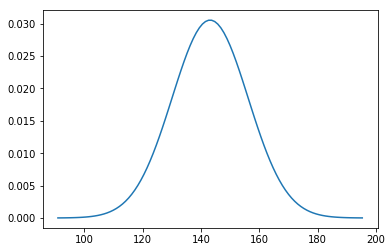

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = np.linspace(upper_envelope.mean() - 4*upper_envelope.std(), upper_envelope.mean() + 4*upper_envelope.std(), 100)
plt.plot(x_values, norm.pdf(x_values, upper_envelope.mean(), upper_envelope.std()))

plt.show()
plt.clf()

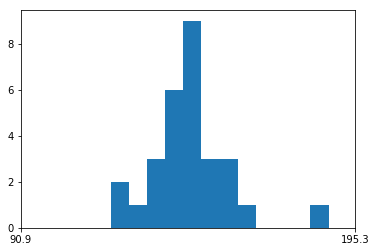

<Figure size 432x288 with 0 Axes>

In [11]:
plt.hist(upper_envelope.dropna(), bins=12)

plt.xticks([upper_envelope.mean() - 4*upper_envelope.std(), upper_envelope.mean() + 4*upper_envelope.std()])

plt.show()
plt.clf()

In [12]:
print("Testing week 8 against results over the [2021/01/01–2021/02/21] period, i.e. [week 0, week 8[")
print("The distribution this time is based on all tuesdays, wednesdays, thursdays and fridays values")
print("=============================================================================================")

print("Common Gaussian distribution used in the following for any day from tuesday to friday:")

mean=upper_envelope.mean()
sigma=upper_envelope.std()

print(f"mean = {mean:.4f}")
print(f"sigma = {sigma:.4f}")
print()

for day in ["tuesday", "wednesday", "thursday", "friday"]: # restricted to days away from the weekly weekend drop
    
    testvalue=float(df.loc[day]["week8"]) # value for that day on week 8
    
    print(f"{day}, week8:")
    print(f"{testvalue} is {float( (testvalue - mean)/sigma ):.4f} sigmas away from the mean over that period.")

    probability = 1 - norm(loc=mean, scale=sigma).cdf(testvalue) # P(x > testvalue)

    print(f"Probability of having a larger value: i.e. P(x > {testvalue}) = {probability:.4g}")
    print()

Testing week 8 against results over the [2021/01/01–2021/02/21] period, i.e. [week 0, week 8[
The distribution this time is based on all tuesdays, wednesdays, thursdays and fridays values
Common Gaussian distribution used in the following for any day from tuesday to friday:
mean = 143.1379
sigma = 13.0513

tuesday, week8:
155.0 is 0.9089 sigmas away from the mean over that period.
Probability of having a larger value: i.e. P(x > 155.0) = 0.1817

wednesday, week8:
150.0 is 0.5258 sigmas away from the mean over that period.
Probability of having a larger value: i.e. P(x > 150.0) = 0.2995

thursday, week8:
142.0 is -0.0872 sigmas away from the mean over that period.
Probability of having a larger value: i.e. P(x > 142.0) = 0.5347

friday, week8:
204.0 is 4.6633 sigmas away from the mean over that period.
Probability of having a larger value: i.e. P(x > 204.0) = 1.556e-06



It would be interesting to proceed with the same test with the data that will appear later this week.

The data for Tuesday March 2nd 2021 will appear on 2021/03/03.